# Visualizing Uncertainty

Adding error bars and confidence intervals to various plots

In [2]:
# imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Tutorial -- Random Data

### Bar Charts

Let's generate five categories, each with a uniformly random sample of 10 values between 0 and 100. Obviously the expected value is 50, but there might be more variation given our small sample size. We want to visualize that variation by plotting each sample mean along with its standard deviation.

Let's first generate the data using numpy:

In [7]:
data = np.random.rand(5, 10) # 5 rows by 10 columns
data = data * 100 # scale each value (originally between 0 and 1)

print(data)

[[49.13659563 97.98730012 97.37133013 59.56265866  3.54673932 82.22668136
  22.77033179 41.43108936 55.94107794 19.10618096]
 [81.80728909 91.61602812 12.62276801 34.05669119 38.51326134 97.25818879
  90.06264372 10.9625112   3.2436048   0.12505417]
 [65.74606358 51.0417188  18.63899107 91.09873099 97.42777701 29.04025283
  92.80971176 68.41673034 62.33715352 45.59487569]
 [77.48735307 12.09935596 55.15080319 84.19241376  8.89386091 63.60705064
   0.53467013 21.45650871 71.10499611 45.42696484]
 [16.04906561 62.25237915  7.79207799 98.3913669  63.16965098 87.11988477
  29.01479736 51.9616209  86.80935691  2.0841614 ]]


Let's create a simple bar chart and plot the means of each row:

[52.90799852736296, 46.026804044657126, 62.2152005583897, 43.99539773283209, 50.4644361970937]


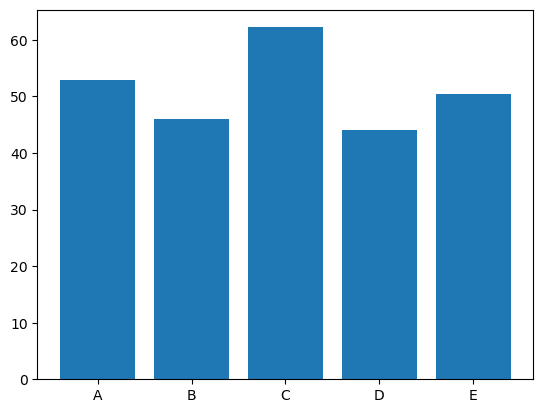

In [10]:
sample_means = [np.mean(row) for row in data]
print(sample_means)

categories = ["A", "B", "C", "D", "E"]

fig, ax = plt.subplots() 
ax.bar(categories, sample_means)

plt.show()

To represent variation in these samples by calculating and plotting the standard deviation:
* Use `np.std` to calculate the standard deviation for each sample

We will want to plot the error bars starting at the sample mean, and then going up and down the length of one standard deviation
* Use `ax.errorbar` to create the error bars
* `yerr` should be the standard deviation calculated 

Documentation:  https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.errorbar.html

[52.90799852736296, 46.026804044657126, 62.2152005583897, 43.99539773283209, 50.4644361970937]
[30.912002825019044, 37.953753939955746, 25.419862131354407, 29.37662779992303, 33.27201734951012]


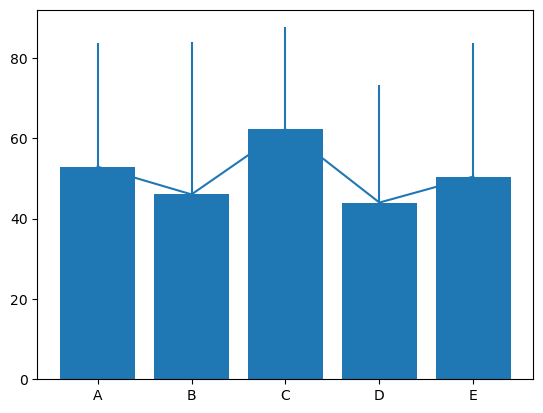

In [14]:
sample_means = [np.mean(row) for row in data]
print(sample_means)

std_devs = [np.std(row) for row in data]
print(std_devs)

categories = ["A", "B", "C", "D", "E"]

fig, ax = plt.subplots() 
ax.bar(categories, sample_means)
ax.errorbar(categories, sample_means, yerr=std_devs)

plt.show()

We can format the error bars by making them a different color, and removing the line connecting them between categories:

[52.90799852736296, 46.026804044657126, 62.2152005583897, 43.99539773283209, 50.4644361970937]
[30.912002825019044, 37.953753939955746, 25.419862131354407, 29.37662779992303, 33.27201734951012]


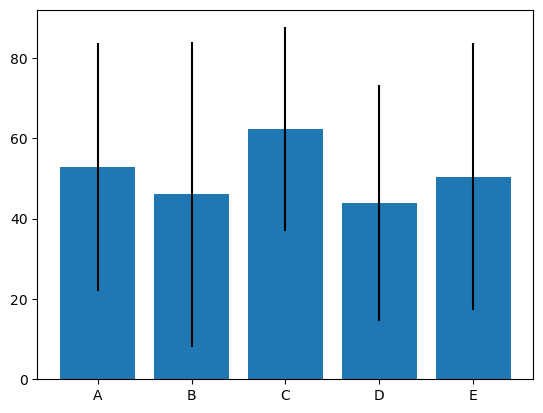

In [15]:
sample_means = [np.mean(row) for row in data]
print(sample_means)

std_devs = [np.std(row) for row in data]
print(std_devs)

categories = ["A", "B", "C", "D", "E"]

fig, ax = plt.subplots() 
ax.bar(categories, sample_means)
ax.errorbar(categories, sample_means, yerr=std_devs, linestyle="", color="black")

plt.show()

As the number of samples increases, the sample means converge to 50 and the sample standard deviations converge to about 30 (calculated from the continuous uniform distribution):

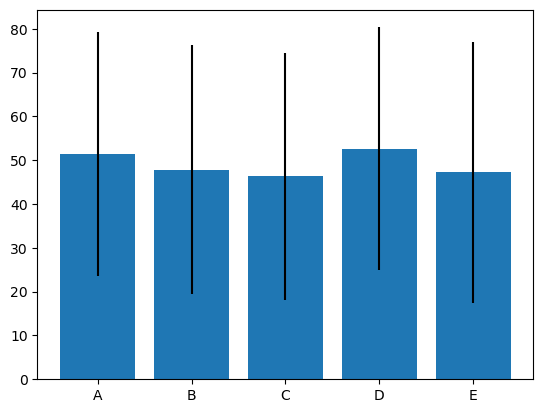

In [20]:
data = np.random.rand(5, 100) # 5 rows by 100 columns
data = data * 100 # scale each value (originally between 0 and 1)

sample_means = [np.mean(row) for row in data]
std_devs = [np.std(row) for row in data]

categories = ["A", "B", "C", "D", "E"]

fig, ax = plt.subplots() 
ax.bar(categories, sample_means)
ax.errorbar(categories, sample_means, yerr=std_devs, linestyle="", color="black")

plt.show()

Instead of plotting means and standard deviations, we could plot median values and interquartile ranges
* Bar heights show the median values of each sample (50% of data below this point)
* Error lines range from quartile 1 (Q1 = 25% of data below this point) to quartile 3 (Q3 = 75% of data below this point)

We can use `np.median` to compute the median, and `np.percentile` to compute the quartile values. Notice that the error bars are no longer symmetric (same value above and below), so we will need to pass both in to `ax.errorbar`:

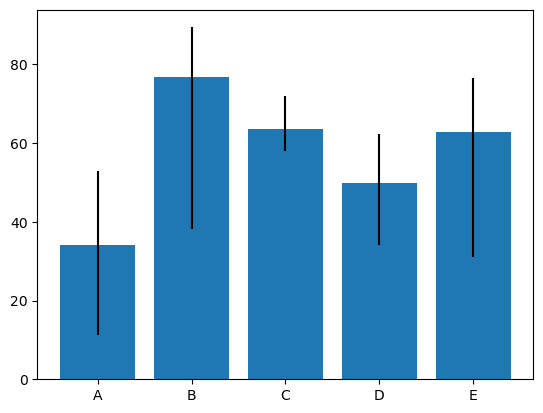

In [60]:
data = np.random.rand(5, 10) # 5 rows by 10 columns
data = data * 100 # scale each value (originally between 0 and 1)

sample_medians = [np.median(row) for row in data]

# calculate difference of quartile values from median
q1_errs = [np.median(row) - np.percentile(row, 25) for row in data]
q3_errs = [np.percentile(row, 75) - np.median(row) for row in data]
error_vals = np.array(list(zip(q1_errs, q3_errs))).T # package together

categories = ["A", "B", "C", "D", "E"]

fig, ax = plt.subplots() 
ax.bar(categories, sample_medians)
ax.errorbar(categories, sample_medians, yerr=error_vals, linestyle="", color="black")

plt.show()

One more note -- if edges are desired at the ends of the error lines, then increase the value of the `capsize` parameter:

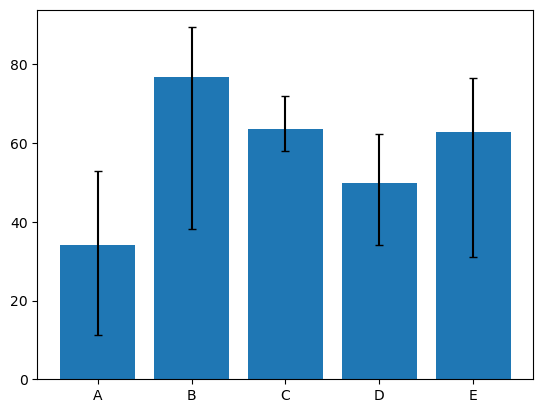

In [63]:
fig, ax = plt.subplots() 
ax.bar(categories, sample_medians)
ax.errorbar(categories, sample_medians, yerr=error_vals, linestyle="", color="black", capsize=3)

plt.show()

### Line Charts

We can also add error bars to line charts. Here's another randomly generated data set, using the normal distribution. We will increment the distribution mean from 1 to 10 across 10 steps, and use a standard deviation of 0.8 each time. 
* `np.random.normal` generates normally distributed data

In [23]:
data = [np.random.normal(loc=i, scale=0.8, size=10) for i in range(1, 11)] 

We can generate a line chart by plotting the sample means from this data set:

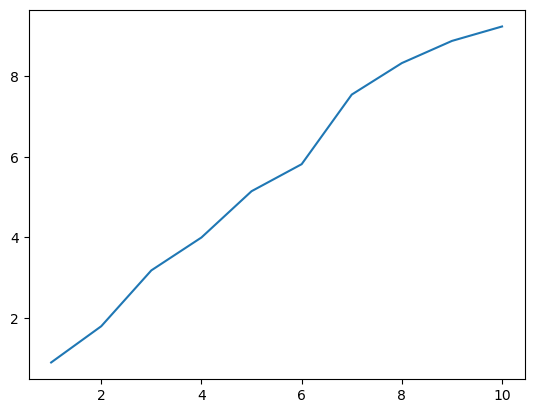

In [24]:
sample_means = [np.mean(row) for row in data]
x_vals = range(1, 11)

fig, ax = plt.subplots() 
ax.plot(x_vals, sample_means)

plt.show()

If instead we used `ax.errorbar`, we could plot both the line and the error bars at the same time. Let's use the standard deviation on each sample again:

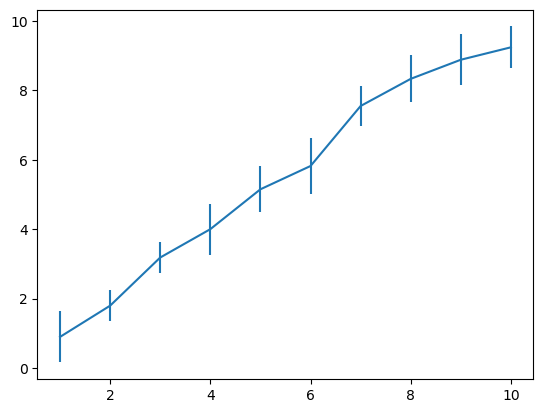

In [25]:
sample_means = [np.mean(row) for row in data]
std_devs = [np.std(row) for row in data]

x_vals = range(1, 11)

fig, ax = plt.subplots() 
ax.errorbar(x_vals, sample_means, yerr=std_devs)

plt.show()

Other methods of showing variation include plotting high and low values.
* We will want to <b>bold</b> the average line

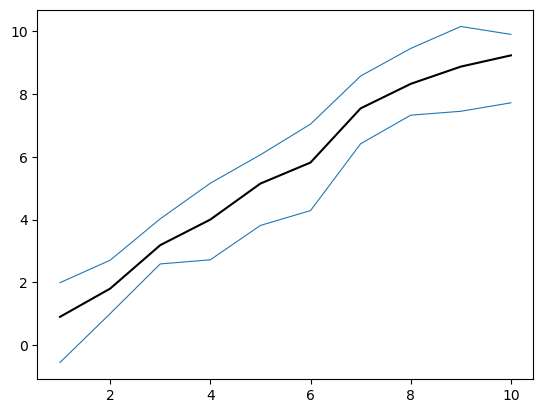

In [26]:
sample_means = [np.mean(row) for row in data]
highs = [np.max(row) for row in data]
lows = [np.min(row) for row in data]

x_vals = range(1, 11)

fig, ax = plt.subplots() 
ax.plot(x_vals, sample_means, color="black", linewidth=1.5)
ax.plot(x_vals, highs, color="tab:blue", linewidth=0.8)
ax.plot(x_vals, lows, color="tab:blue", linewidth=0.8)

plt.show()

We could also color in the area between the high and low values using `ax.fill_between`:

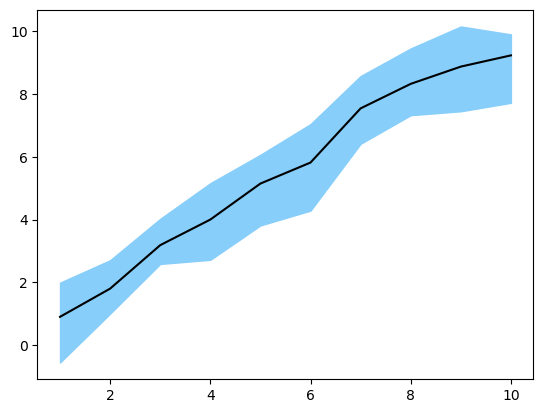

In [28]:
sample_means = [np.mean(row) for row in data]
highs = [np.max(row) for row in data]
lows = [np.min(row) for row in data]

x_vals = range(1, 11)

fig, ax = plt.subplots() 
ax.plot(x_vals, sample_means, color="black", linewidth=1.5)
ax.fill_between(x_vals, highs, lows, color="lightskyblue")

plt.show()

A color gradient can also be applied to visualize distance from the sample mean by standard deviation:
* Dark color within 1 standard deviation
* Medium color within 2 standard deviations
* Light color within 3 standard deviations

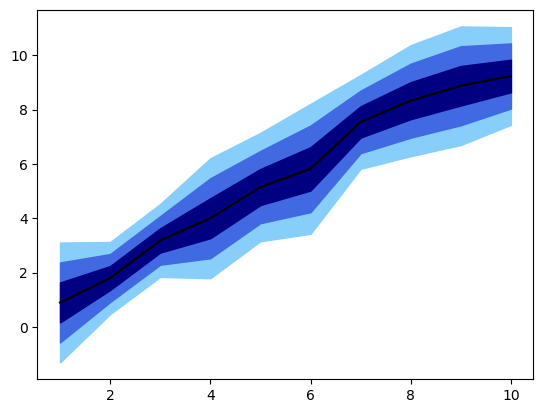

In [29]:
sample_means = [np.mean(row) for row in data]
std_devs = [np.std(row) for row in data]

# 1 std dev
highs_1 = [np.mean(row) + np.std(row) for row in data]
highs_2 = [np.mean(row) + 2*np.std(row) for row in data]
highs_3 = [np.mean(row) + 3*np.std(row) for row in data]

lows_1 = [np.mean(row) - np.std(row) for row in data]
lows_2 = [np.mean(row) - 2*np.std(row) for row in data]
lows_3 = [np.mean(row) - 3*np.std(row) for row in data]

x_vals = range(1, 11)

fig, ax = plt.subplots() 
ax.plot(x_vals, sample_means, color="black", linewidth=1.5)
ax.fill_between(x_vals, highs_3, lows_3, color="lightskyblue")
ax.fill_between(x_vals, highs_2, lows_2, color="royalblue")
ax.fill_between(x_vals, highs_1, lows_1, color="navy")

plt.show()

Yes, it looks a bit like a fish. Continuing the process multiple times can produce a continous color gradient:

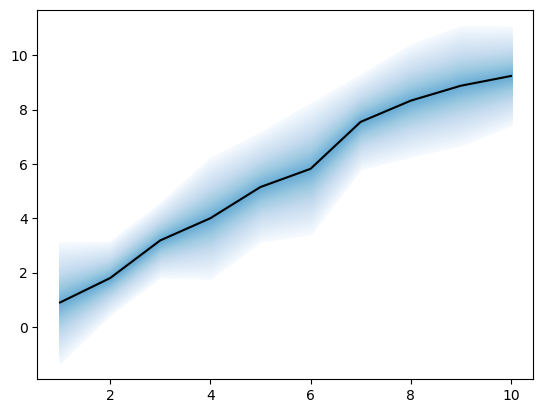

In [53]:
sample_means = [np.mean(row) for row in data]
std_devs = [np.std(row) for row in data]

cmap = plt.get_cmap("Blues") # can index between 0 and 1 for specific colors (lower = lighter here)


# produce 1000 steps for color gradient
num_steps = 1000
highs = []
lows = []
for i in range(1, num_steps + 1):
    # Interval is 3 standard deviations 
    highs.append([np.mean(row) + (3*i / num_steps) * np.std(row) for row in data])
    lows.append([np.mean(row) - (3*i / num_steps) * np.std(row) for row in data])

x_vals = range(1, 11)

fig, ax = plt.subplots() 
ax.plot(x_vals, sample_means, color="black", linewidth=1.5)

for i in range(num_steps-1, -1, -1):    
    cur_color_val = (1 - (i / num_steps)) / 2 # varies from 0 to 0.5
    ax.fill_between(x_vals, highs[i], lows[i], color=cmap(cur_color_val) )

plt.show()